# 05. forecast(시계열분석)


# 1. 배경 및 설치
- 윈도우 유저는 visual c++ build tool 먼저 설치
- conda install pandas-datareader
- conda install -c conda-forge fbprophet
- pip install fbprophet

```
pip list | grep fbprophet
!pip install pandas-datareader
!pip install fbprophet
# 버전업그레이드
pip install --upgrade setuptools
```

In [1]:
%reset

In [2]:
from pandas_datareader import data 
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


## 함수(def)의 기초


In [3]:
def test_def(a,b):
    return a + b

In [4]:
def test_de(a,b):
    print(a + b)

In [5]:
c = test_def(5,3)

In [6]:
5+c

13

In [7]:
c = test_de(5,3)
c+1

8


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

- 가장 기초적인 모양의 def 정의 
- 이름(test_df) 과 입력 인자 (a,b)를 정해준다
- 출력(return) 작성

In [8]:
#전역변수(global)
a = 1
def edit_a(i):
    #지역변수(local)
    global a 
    a = i 

In [9]:
edit_a(2)

In [10]:
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언

In [ ]:
def edit_a(i):
    a = i

In [ ]:
edit_a(5)
print(a)

2


- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것은 아님.

$$ y = asin(2\pi ft + t_0) + b $$ 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

In [11]:
def plotSinWave(**kwargs):
    '''
    plot sin wave 
    y = asin(2\pi ft + t_0) + b
    '''
    endTime = kwargs.get('endTime',1)
    sampleTime = kwargs.get('sampleTime',0.01)
    amp = kwargs.get('amp',1)
    freq = kwargs.get('freq',1)
    startTime = kwargs.get('startTime',0)
    bias = kwargs.get('bias',0)
    figsize = kwargs.get('figsize',(12,6))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp* np.sin(2* np.pi * freq * time + startTime) + bias 

    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "*sin(2*pi" +str(freq) + '*t+'+str(startTime)+ " ) + " + str(bias))
    plt.show()

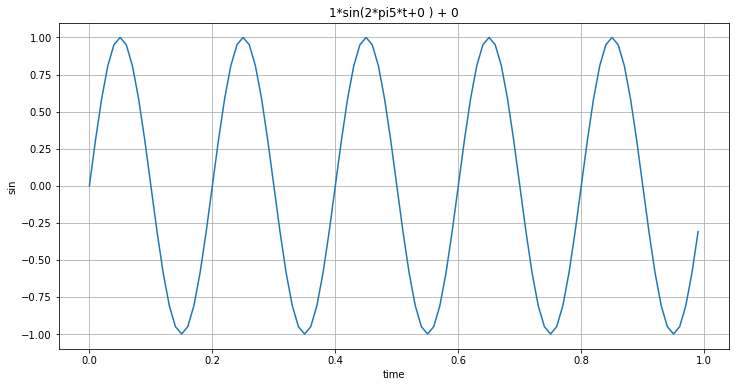

In [ ]:
plotSinWave(freq=5)

## 내가 만든 함수 import
- drawSineWave.py   

In [ ]:
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt 

def plotSinWave(**kwargs):
    '''
    plot sin wave 
    y = asin(2\pi ft + t_0) + b
    '''
    endTime = kwargs.get('endTime',1)
    sampleTime = kwargs.get('sampleTime',0.01)
    amp = kwargs.get('amp',1)
    freq = kwargs.get('freq',1)
    startTime = kwargs.get('startTime',0)
    bias = kwargs.get('bias',0)
    figsize = kwargs.get('figsize',(12,6))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp* np.sin(2* np.pi * freq * time + startTime) + bias 

    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title( str(amp) + "*sin(2*pi" +str(freq) + '*t+'+str(startTime)+ " ) + " + str(bias) )
    plt.show()
if __name__ == '__main__':
    print('hello world')
    print('this is test graph')
    plotSinWave(amp=1,endTime=2)

Overwriting ./drawSinWave.py


In [ ]:
import drawSinWave as dS 

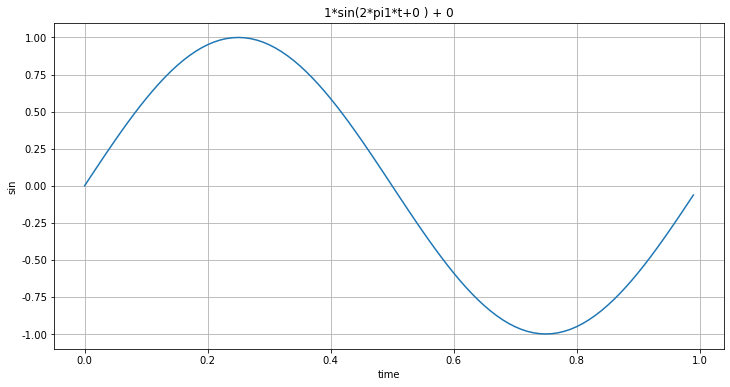

In [ ]:
dS.plotSinWave()

In [ ]:
import pandas as pd 
pd.read_csv()

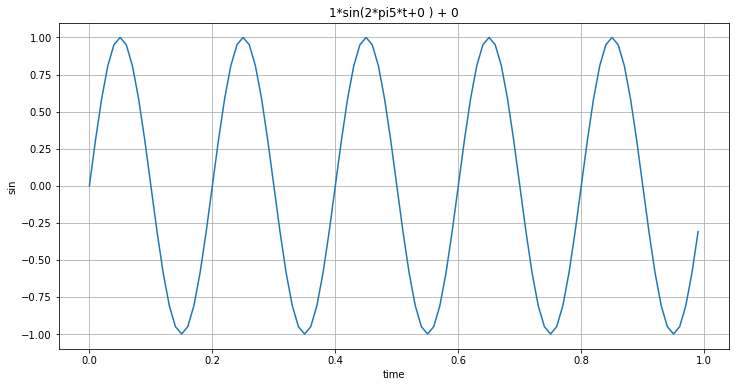

In [ ]:
dS.plotSinWave(freq=5)

## 그래프 한글 설정 


In [ ]:
%%writefile ./set_matplotlib_hangul.py 

import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() =='Darwin':
    print('Hangul OK in your MAC!!')
    rc('font',family='Arial Unicode MS')
elif platform.system() =='Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    print('hangeul ok in your Windows!!')
    rc('font',family=font_name)
else:
    print('unknown system sorry')
plt.rcParams['axes.unicode_minus'] =False

Overwriting ./set_matplotlib_hangul.py


In [ ]:
import set_matplotlib_hangul 

# 2. fbPropthet 기초 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

1

In [2]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2018-01-01',periods=365*2,freq='D')
df = pd.DataFrame({'ds':ds,'y':result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


<AxesSubplot:>

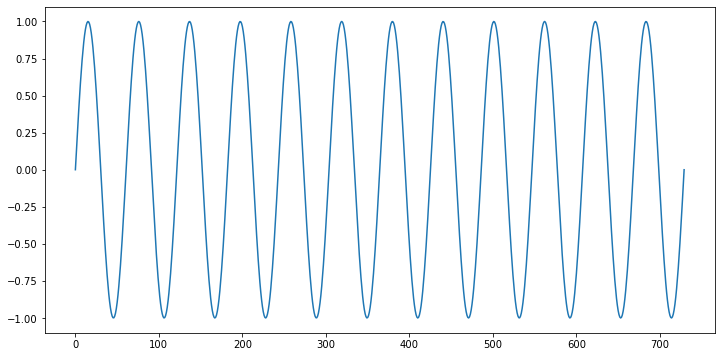

In [4]:
df['y'].plot(figsize=(12,6))

In [3]:
from fbprophet import Prophet

In [4]:
m = Prophet(yearly_seasonality =True, daily_seasonality=True)
m.fit(df)
future= m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


KeyError: 'metric_file'